# Machine Learning

## Categorías
*Aprendizaje supervizado 

Clasificación: Modelos que predicen las etiquetas como dos o más categorías discretas.

Regresión: Modelos que predicen etiquetas continuas.

*Aprendezaje no supervizado

Clustering; Modelos que detectan e identifican distintos grupos en los datos.

Reducción de dimencionalidad: Modelos que detectan e identifican estructuras de menor dimensión en datos de mayor dimención.

### Introducción a Scikit-Learn

In [3]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


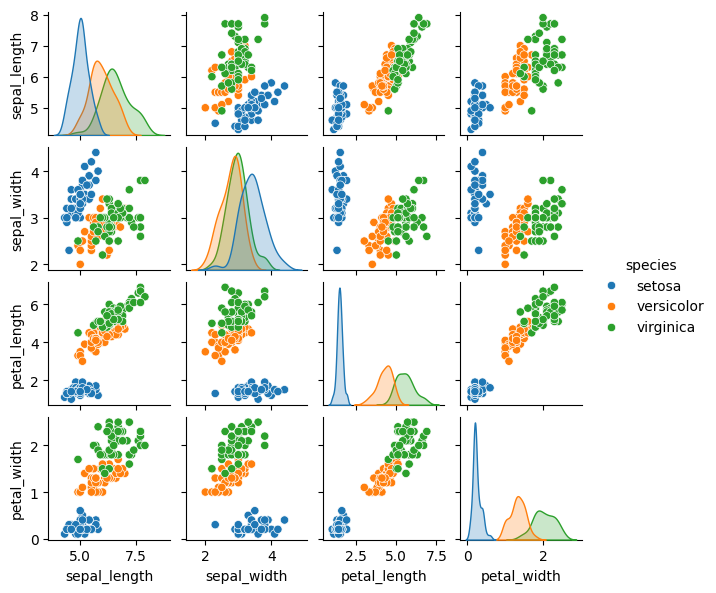

In [4]:
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue = 'species', height = 1.5)

In [5]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

### Ejemplos de aprendizaje supervisado: Regresión lineal Simple

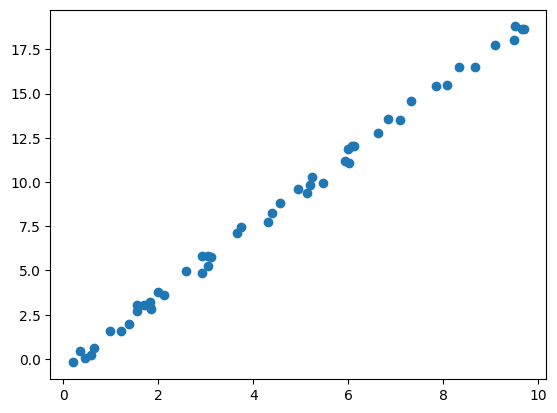

In [7]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.rand(50)
plt.scatter(x,y);

### 1. Elegir una clase de modelo
En Scikit-Learn, cada clase de modelo is representada por una clase de Python

### 2. Elegir hyperparametros del modelo
Un punto importante es que una clase de modelo no es lo mismo que una instancia de un modelo

### 3. Organizar datos en matrices de caracteristicas y vectores objetivo

### 4. Ajustar el modelo a los datos

### 5. Predecir etiquetas para datos desconocidos
Una vez el modelo ha sido entrenado, la tarea principal de Machine Learning supervisado es evaluarlo basado sobre que nos dice de los nuevos datos que no fueron parte del conjunto de entrenamiento. 


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression(fit_intercept=True)
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [20]:
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
model.coef_

array([2.00660766])

In [22]:
model.intercept_

np.float64(-0.5350275750799973)

In [23]:
xfit = np.linspace(-1, 11)

In [24]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

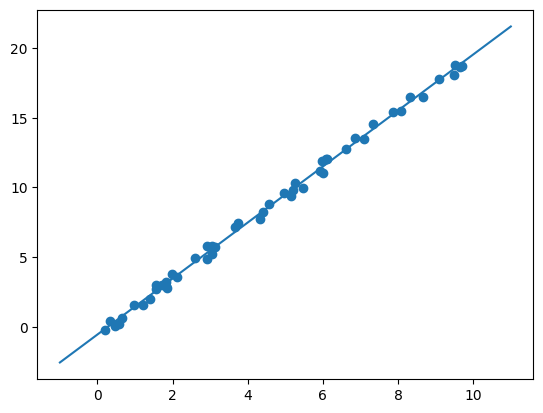

In [25]:
plt. scatter(x,y)
plt.plot(xfit, yfit)

### Ejemplo de aprendizaje supervisado: Clasificación Iris

In [26]:
#Dividir los datos en conjunto de entrenamiento y conjunto de prueba

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state = 1)

In [27]:
from sklearn.naive_bayes import GaussianNB  #Elegir la clase de modelo
model = GaussianNB()                        #Instanciar el modelo
model.fit(Xtrain, ytrain)                   #Ajustar el modelo a los datos
y_model = model.predict(Xtest)              #Predecir sobre los nuevos datos

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Ejemplo de aprendizaje no supervisado: Dimensionalidad de Iris

La tarea de reducción de dimensionalidad se centra al rededor de determinar.
PCA: Principal Component Analysis

In [29]:
from sklearn.decomposition import PCA   # 1. Elegir el modelo de clase
model = PCA(n_components=2)             # 2. Instanciar el modelo
model.fit(X_iris)                       # 3. Ajustar el modelo a los datos
X_2D = model.transform(X_iris)          # 4. Transformar los datos

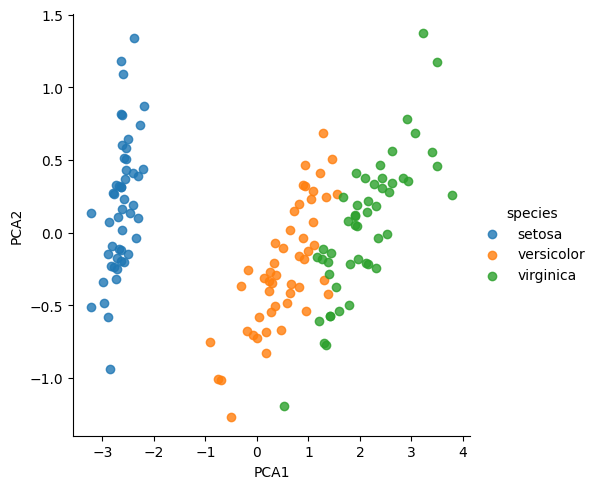

In [31]:
#Gráficar los resultados. Una manera rapida de hacer esto es insertar los resultados dentro de el DataFrame original Iris, y usar Seaborn lmplot para mostrar los resultados

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

sns.lmplot(x = "PCA1", y = "PCA2", hue = 'species', data=iris, fit_reg=False)

### Ejemplo aprendizaje no supervisado: Clustering de Iris
Un algoritmo de closterización intenta encontrar distintos grupos de datos sin referencia o cualqueir etiqueta. Aquí se susara un poderoso método de clustering llamado Gaussian Mixure Model (GMM) 

In [32]:
from sklearn.mixture import GaussianMixture         # 1. Elegir la clase de modelo
model = GaussianMixture(n_components=3,
                        covariance_type= 'full')    # 2. Instanciar el modelo

model.fit(X_iris)                                   # 3. Ajustar el modelo a los datos
y_gmm = model.predict(X_iris)                       # 4. Determinar las etiquetas

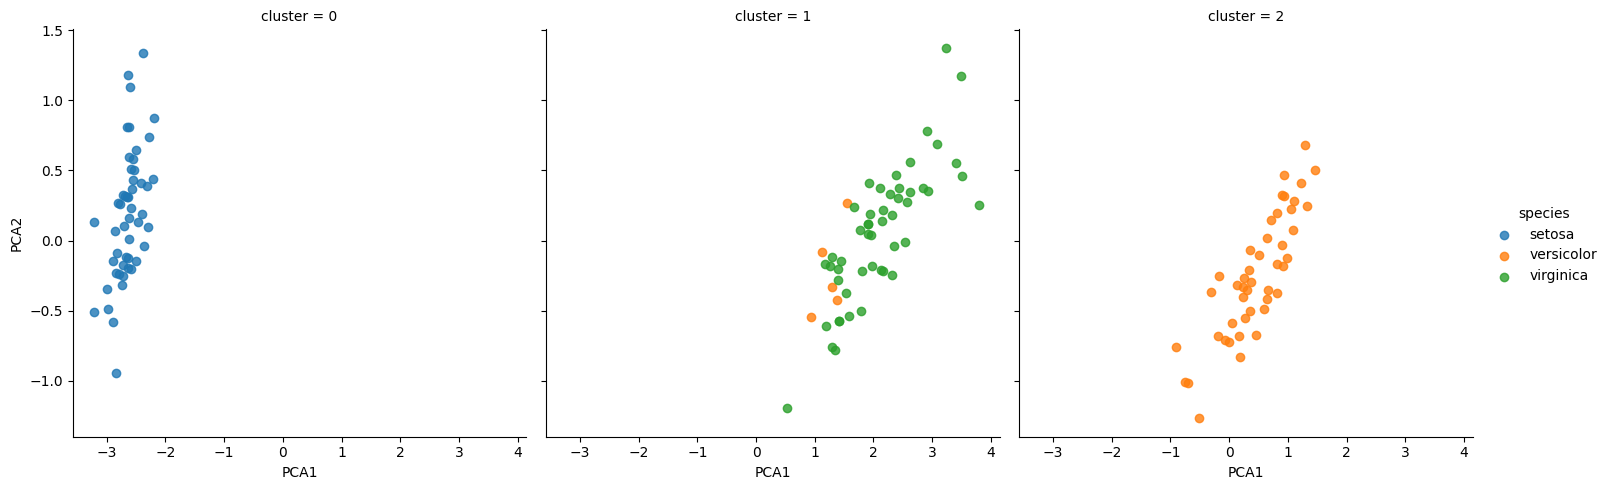

In [33]:
iris['cluster'] = y_gmm
sns.lmplot(x = "PCA1", y = "PCA2", data = iris, hue='species',
           col = 'cluster', fit_reg = False);

## Aplicación: Explorando digitos escritos a mano

In [34]:
#Cargar y visualizar los datos de digitos

from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

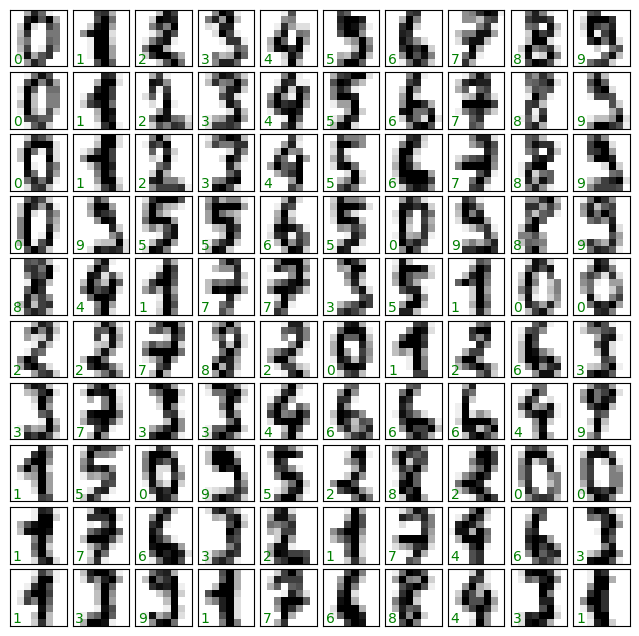

In [36]:
#Los datos de imagenes es un arreglo tridimencional de 1,797 muestras cada consiste en un grid de 8 x 8 pixeles. A continuación se mostraran los primeros cientos de ello

import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize = (8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform = ax.transAxes, color = 'green')

In [37]:
X = digits.data
X.shape

(1797, 64)

In [38]:
y = digits.target
y.shape

(1797,)